# Step 1: Load the datasets

## 1.1 Importing necessary libraries


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 1.2 Load the datasets

In [54]:
sales_df = pd.read_csv('sales.csv')
promotion_df = pd.read_csv('promotion.csv')
supermarkets_df = pd.read_csv('supermarkets.csv')
item_df = pd.read_csv('item.csv')

## 1.3 Handle Null values and duplicate values if exists


### 1.3.1 Sales data

In [55]:
sales_df.head(5)

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [56]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   code         1048575 non-null  int64  
 1   amount       1048575 non-null  float64
 2   units        1048575 non-null  int64  
 3   time         1048575 non-null  int64  
 4   province     1048575 non-null  int64  
 5   week         1048575 non-null  int64  
 6   customerId   1048575 non-null  int64  
 7   supermarket  1048575 non-null  int64  
 8   basket       1048575 non-null  int64  
 9   day          1048575 non-null  int64  
 10  voucher      1048575 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 88.0 MB


Here, all columns are numerical columns.




In [57]:
# Change the column name in sales_df
sales_df.rename(columns={'supermarket': 'sales_supermarket'}, inplace=True)

In [58]:
# Display the number of unique values in each column of sales_df
unique_values = sales_df.nunique()
print(unique_values)

code                    782
amount                  971
units                    30
time                   1440
province                  2
week                     25
customerId           249610
sales_supermarket       376
basket               665450
day                     166
voucher                   2
dtype: int64


In [59]:
print(sales_df.duplicated().value_counts())

False    1048575
Name: count, dtype: int64


### 1.3.2 Promotion data

In [60]:
promotion_df.head(5)

,code,supermarkets,week,feature,display,province
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap,2
1,2700042292,285,92,Interior Page Feature,Not on Display,2
2,2700042274,285,92,Interior Page Feature,Not on Display,2
3,2700042273,285,92,Interior Page Feature,Not on Display,2
4,2700042254,285,92,Interior Page Feature,Not on Display,2


In [61]:
promotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351372 entries, 0 to 351371
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   code          351372 non-null  int64 
 1   supermarkets  351372 non-null  int64 
 2   week          351372 non-null  int64 
 3   feature       351372 non-null  object
 4   display       351372 non-null  object
 5   province      351372 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ MB


Here, feature and display are the categorical columns others are numerical columns.

In [62]:
promotion_df.rename(columns={'supermarkets': 'promotion_supermarket'}, inplace=True)


In [63]:
unique_values = promotion_df.nunique()
print(unique_values)

code                     479
promotion_supermarket    381
week                      62
feature                    8
display                   11
province                   2
dtype: int64


In [64]:
print(promotion_df.duplicated().value_counts())

False    351372
Name: count, dtype: int64


### 1.3.3 Supermarkets data

In [65]:
supermarkets_df.head(5)

,supermarket_No,postal-code
0,199,30319
1,200,30134
2,201,30066
3,202,31093
4,203,30542


In [66]:
supermarkets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   supermarket_No  387 non-null    int64
 1   postal-code     387 non-null    int64
dtypes: int64(2)
memory usage: 6.2 KB


Here, both columns are categorical columns.

In [67]:
supermarkets_df.rename(columns={'supermarket_No': 'supermarket_no'}, inplace=True)

In [68]:
unique_values = supermarkets_df.nunique()
print(unique_values)

supermarket_no    387
postal-code       299
dtype: int64


In [69]:
print(supermarkets_df.duplicated().value_counts())

False    387
Name: count, dtype: int64


### 1.3.4 Items data

In [70]:
item_df.head(5)

,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,Type 1,Aunt Jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,Type 1,Bisquick,6.75 OZ


In [71]:
item_df.rename(columns={'descrption': 'description'}, inplace=True)

In [72]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   code         927 non-null    int64 
 1   description  927 non-null    object
 2   type         927 non-null    object
 3   brand        927 non-null    object
 4   size         927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


Here, except code others are categorical columns.

In [73]:
unique_values = item_df.nunique()
print(unique_values)

code           927
description    872
type             4
brand          131
size           146
dtype: int64


In [74]:
print(item_df.duplicated().value_counts())

False    927
Name: count, dtype: int64


Here, description, type, brand and size are the categorical variables of the dataset item.csv

They are no duplicates in any of the datatsets above.

# Step 2: Produce Q-Q Plots and Histograms of the features, and apply the transformations if required.

## 2.1 Sales data transformation

 **Columns Suitable for Q-Q Plots and Skewness Calculations:**


1.   amount: Since it has a considerable number of unique values (971) and is a continuous variable, it is suitable for Q-Q plots and skewness calculation.
2.   units:While it has fewer unique values (30), it is still numeric, and you can evaluate its distribution.
3. basket: With 665450 unique values, this continuous numeric column is also suitable for both Q-Q plots and skewness.




code, province, week, customerId, supermarket, day, and voucher:
These columns have relatively low unique counts (especially those with categorical characteristics) and would not be suitable for Q-Q plots or skewness calculations, as they are likely categorical variables.

In [75]:
# Define columns to analyze
columns_to_analyze = ['amount', 'units', 'basket']

In [76]:
# Calculate skewness for the selected columns
skew = sales_df[columns_to_analyze].skew()
print("-------- Skewness --------")
for column, skew_value in zip(columns_to_analyze, skew):
    print(f"{column} : {skew_value:.4f}")

-------- Skewness --------
amount : 927.7559
units : 12.1610
basket : -0.0036


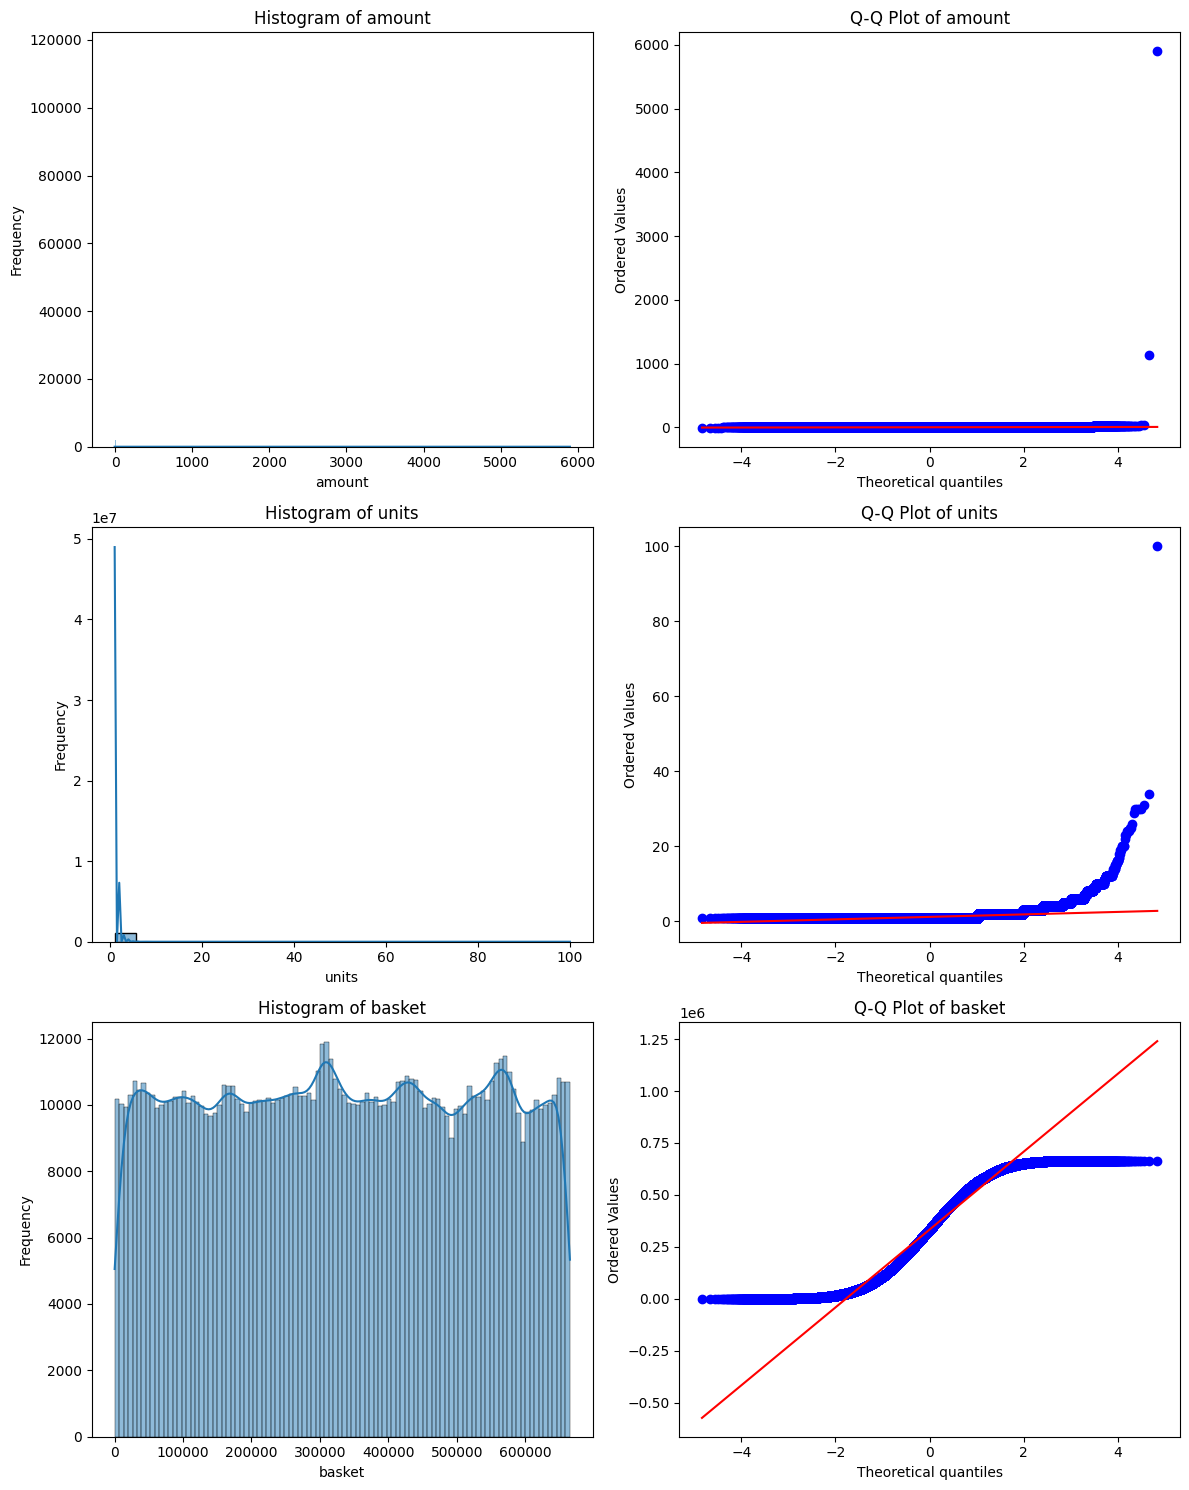

In [25]:
# Set the figure size for histograms and Q-Q plots
fig, axes = plt.subplots(nrows=len(columns_to_analyze), ncols=2, figsize=(12, 5 * len(columns_to_analyze)))

for i, column in enumerate(columns_to_analyze):
    # Plot the histogram
    sns.histplot(sales_df[column], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Plot the Q-Q plot
    stats.probplot(sales_df[column].dropna(), dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot of {column}')

plt.tight_layout()
plt.show()

Data columns have continuous values. When considering the continuous data normal distribution brings a lot of advantages when training a machine learning model. To check the normality of skewness of continuous data we can use Quartile — Quartile plot(QQ plot).

Above diagram, the first column shows the histogram with KDE line and the second column shows QQ plot for the all feature columns in the dataset.

When we consider amount and units are positively skewed. Its skewness values are 927.7559 and 12.1610 respectively.

### 2.1.1 amount data transformation

<Axes: >

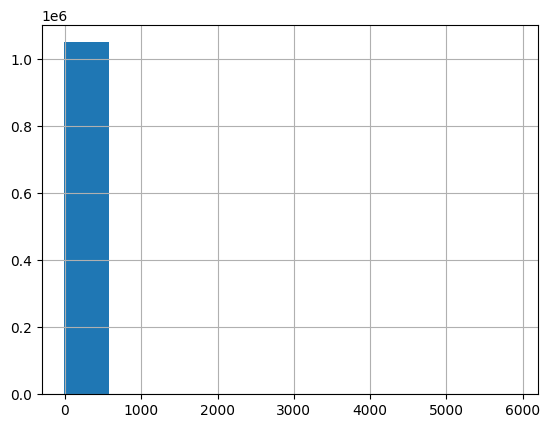

In [26]:
sales_df['amount'].hist()

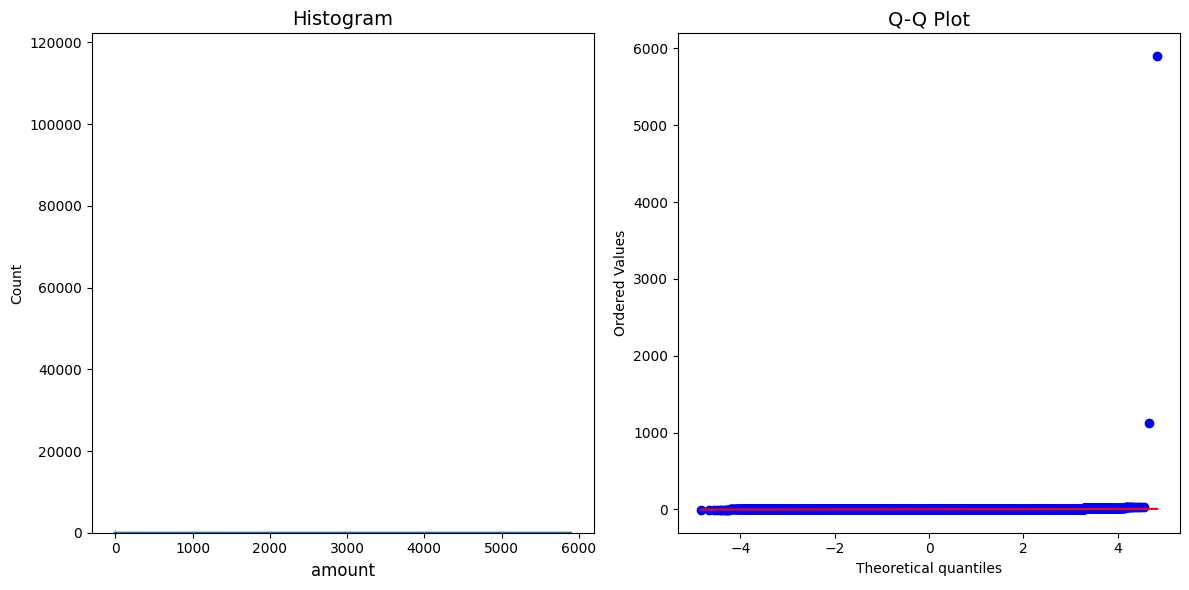

In [27]:
# Create a figure with two subplots for each visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram
sns.histplot(sales_df["amount"], kde=True, ax=axes[0])
axes[0].set_title("Histogram", fontsize=14)
axes[0].set_xlabel("amount", fontsize=12)

# Q-Q Plot
stats.probplot(sales_df["amount"], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot", fontsize=14)

plt.tight_layout()
plt.show()

In [77]:
# Check for negative values in the 'amount' column
if (sales_df['amount'] < 0).any():
    sales_df['amount'] = sales_df['amount'].clip(lower=0)

# Drop rows with NaN values if you chose the NaN replacement method
sales_df.dropna(subset=['amount'], inplace=True)

# Create the transformer with the sqrt method and no standardization
transformer = FunctionTransformer(np.sqrt, validate=True)

# Reshape the data to a 2D array
data_2d = sales_df[["amount"]].values

# Fit the transformer to your data
transformer.fit(data_2d)

# Apply the transformation to your data
data_transformed = transformer.transform(data_2d)

# Update the "amount" column in your DataFrame
sales_df["amount"] = data_transformed

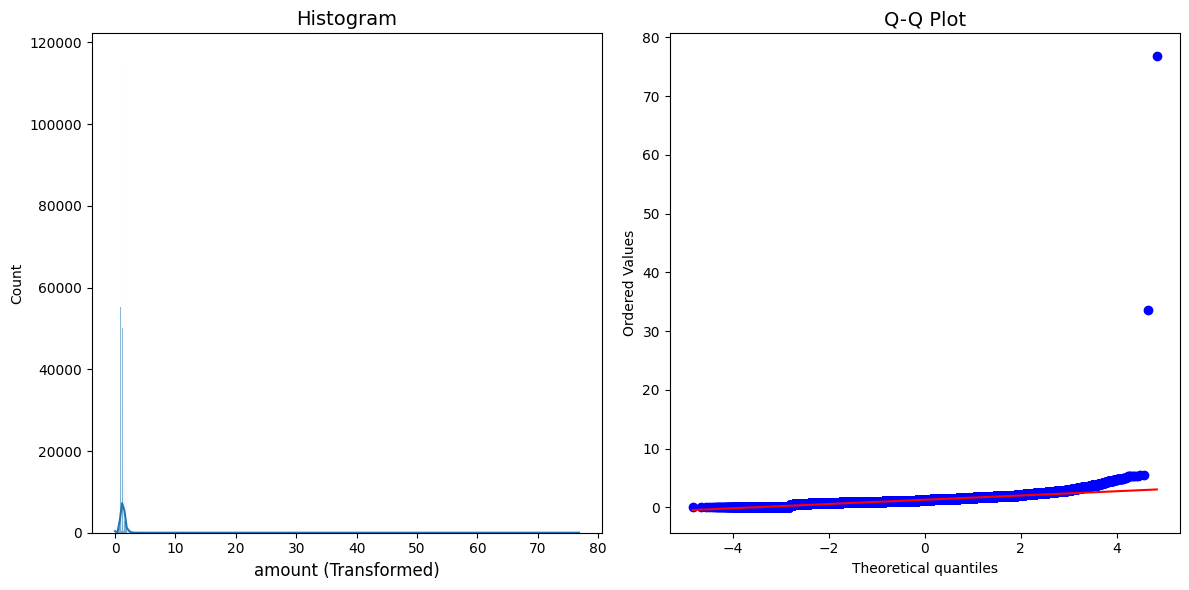

In [78]:
# Create a figure with two subplots for each visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram
sns.histplot(sales_df["amount"], kde=True, ax=axes[0])
axes[0].set_title("Histogram", fontsize=14)
axes[0].set_xlabel("amount (Transformed)", fontsize=12)

# Q-Q Plot
stats.probplot(sales_df["amount"], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot", fontsize=14)

plt.tight_layout()
plt.show()

### 2.1.2 units data transformation

<Axes: >

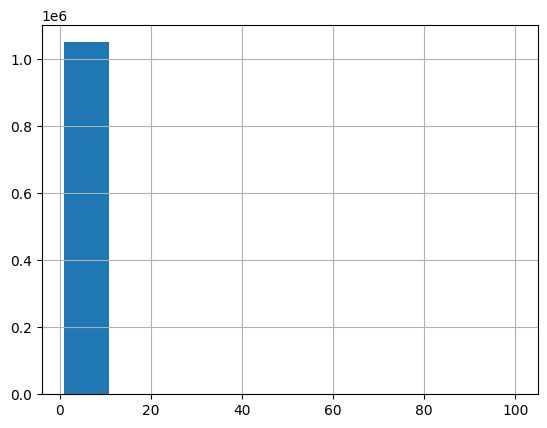

In [30]:
sales_df['units'].hist()

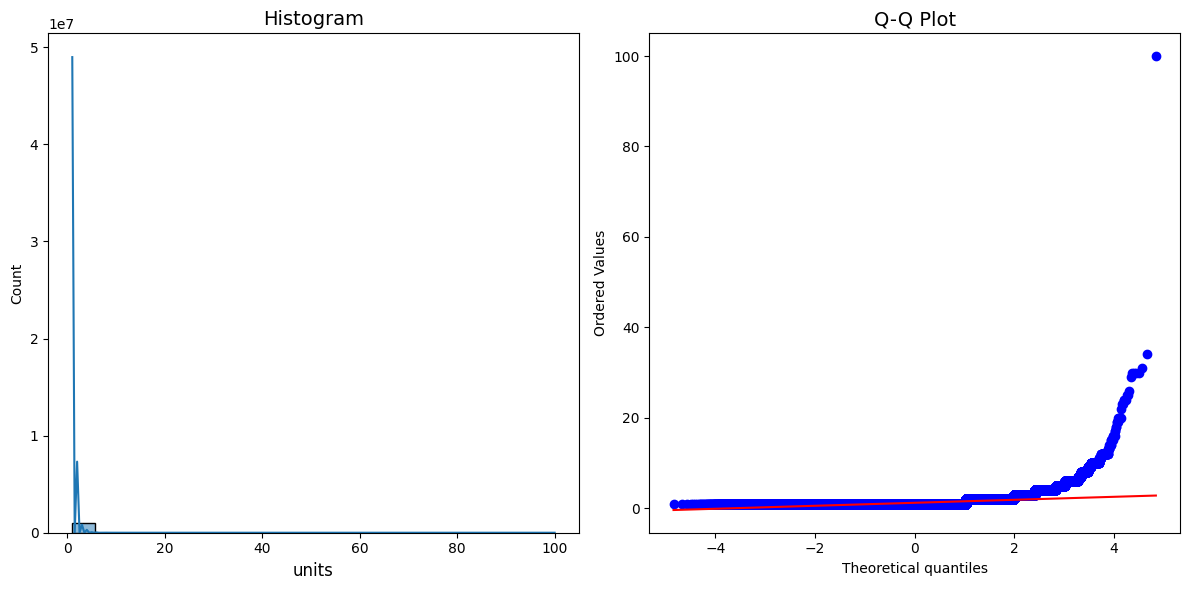

In [31]:
# Create a figure with two subplots for each visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram
sns.histplot(sales_df["units"], kde=True, ax=axes[0])
axes[0].set_title("Histogram", fontsize=14)
axes[0].set_xlabel("units", fontsize=12)

# Q-Q Plot
stats.probplot(sales_df["units"], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot", fontsize=14)

plt.tight_layout()
plt.show()

In [79]:
# Create the transformer with the sqrt method and no standardization
transformer = FunctionTransformer(np.sqrt, validate=True)

# Reshape the data to a 2D array
data_2d = sales_df[["units"]].values

# Fit the transformer to your data
transformer.fit(data_2d)

# Apply the transformation to your data
data_transformed = transformer.transform(data_2d)

# Update the "units" column in your DataFrame
sales_df["units"] = data_transformed

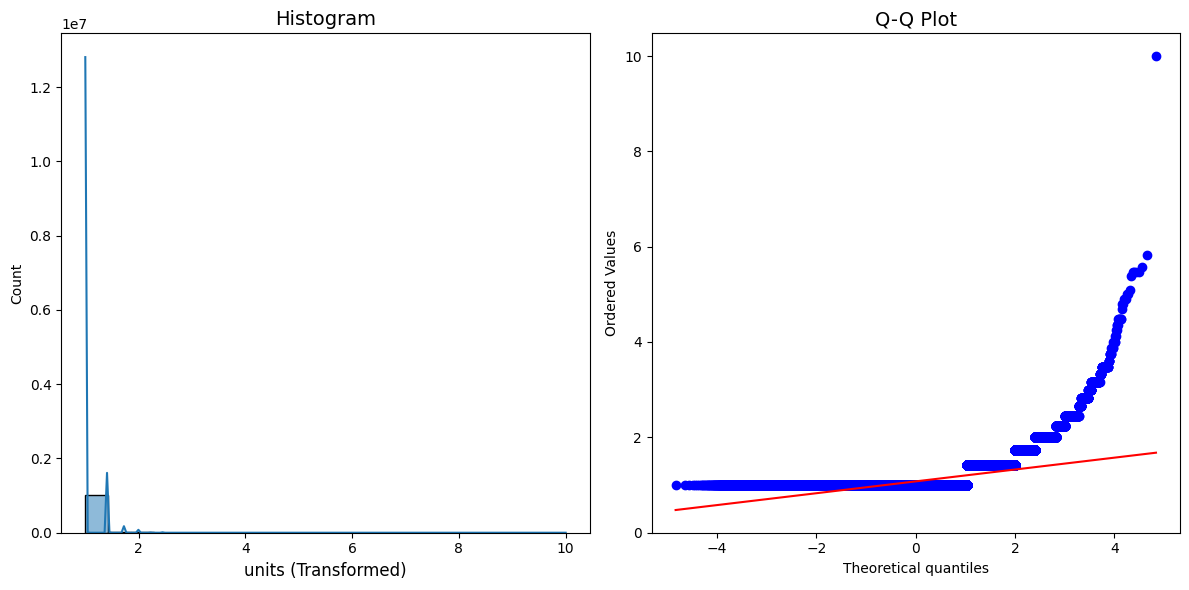

In [33]:
# Create a figure with two subplots for each visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram
sns.histplot(sales_df["units"], kde=True, ax=axes[0])
axes[0].set_title("Histogram", fontsize=14)
axes[0].set_xlabel("units (Transformed)", fontsize=12)

# Q-Q Plot
stats.probplot(sales_df["units"], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot", fontsize=14)

plt.tight_layout()
plt.show()

In [80]:
# Calculate skewness for the selected columns
skew = sales_df[columns_to_analyze].skew()
print("-------- Skewness --------")
for column, skew_value in zip(columns_to_analyze, skew):
    print(f"{column} : {skew_value:.4f}")

-------- Skewness --------
amount : 8.9535
units : 3.3898
basket : -0.0036


Other datasets like Promotion data, Supermarkets data and Items data no need of data transformation because there most of them are categorical variables and numerical variables are no need transformation.

# Step 3: Merge Datasets


## 3.1 Merge sales with item on code column

In [81]:
# Merge item and sales data
item_sales = pd.merge(sales_df, item_df, on='code', how='left')

In [82]:
item_sales.tail(5)

,code,amount,units,time,province,week,customerId,sales_supermarket,basket,day,voucher,description,type,brand,size
1048570,1510000011,1.532971,1.000000,1307,2,27,43825,346,665448,189,0,CREAMETTE ELBO MACARONI,Type 2,Creamette,32 OZ
1048571,3620000489,0.994987,1.000000,1307,2,27,43825,346,665448,189,0,RAGU RBST ITALIAN MEAT,Type 3,Ragu,26 OZ
1048572,9999971309,1.414214,1.414214,1410,2,27,42140,346,665449,189,0,PRIVATE LABEL HS SPAG SCAUCE W/MUSH,Type 3,Private Label,26 OZ
1048573,3620000250,1.407125,1.414214,1415,2,27,53544,346,665450,189,0,RAGU TRADITIONAL PLAIN,Type 3,Ragu,26 OZ
1048574,3620000350,1.407125,1.414214,1415,2,27,53544,346,665450,189,0,RAGU TRADITIONAL MUSHROOM,Type 3,Ragu,26 OZ


In [83]:
print(item_sales.duplicated().value_counts())

False    1048575
Name: count, dtype: int64


## 3.2 Merge promotion with item on code column

In [84]:
# Merge item and promotion data
item_promotion = pd.merge(promotion_df, item_df, on='code', how='left')

In [85]:
item_promotion.tail(5)

,code,promotion_supermarket,week,feature,display,province,description,type,brand,size
351367,9999966721,387,101,Wrap Front Feature,Not on Display,1,PRIVATE LABEL SPAG SAUCE MUSHROOM,Type 3,Private Label,26 OZ
351368,9999966720,387,101,Wrap Front Feature,Not on Display,1,PRIVATE LABEL SPAGHTTI SAUCE MEAT,Type 3,Private Label,26 OZ
351369,3620000507,387,104,Interior Page Feature,Not on Display,1,BERTOLLI VODKA Type 2 SAUC,Type 3,Bertolli,26 OZ
351370,3620000493,387,104,Interior Page Feature,Not on Display,1,BERTLI MED OLV W/SNDRD TM,Type 3,Bertolli,24 OZ
351371,9999966715,387,101,Wrap Front Feature,Not on Display,1,PRIVATE LABEL SPAG SCE TRADITIONAL,Type 3,Private Label,26 OZ


In [86]:
print(item_promotion.duplicated().value_counts())

False    351372
Name: count, dtype: int64


# Step 4: Data Analysis for Business Insights


## 4.1 Solution 1:  Time-Series Sales Forecasting:

Forecasting future sales based on past sales trends is a key application of machine learning in the retail sector. By utilizing the linear regression model, we can predict future sales and help the supermarket chain optimize stock and promotions.

Mean Squared Error: 40548027391.43


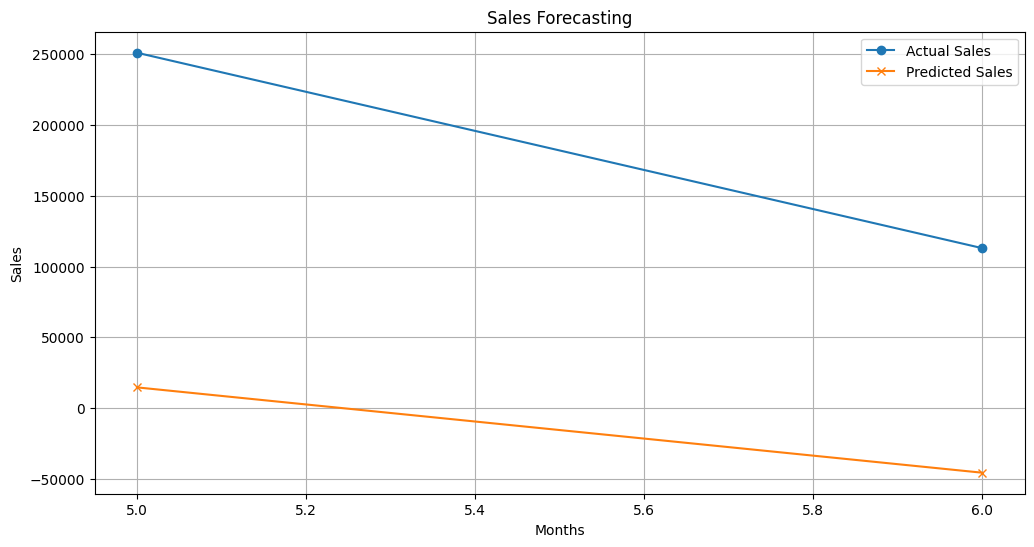

In [87]:
item_sales['year'] = 2024  # Replace with actual year if available

# Combine 'year', 'week', and 'day' to form a valid date
# Use the first day of the week (Monday) as a reference, then add the day offset
item_sales['Date'] = pd.to_datetime(item_sales['year'].astype(str) + item_sales['week'].astype(str) + '1', format='%Y%W%w')

# Solution 1: Time-Series Sales Forecasting
# Group data by month and sum sales
item_sales_monthly = item_sales.groupby(item_sales['Date'].dt.to_period('M'))['amount'].sum().reset_index()
item_sales_monthly['Date'] = item_sales_monthly['Date'].dt.to_timestamp()

# Prepare the data for forecasting
X = item_sales_monthly.index.values.reshape(-1, 1)  # Index as predictor (month)
y = item_sales_monthly['amount'].values

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the predictions vs actual sales
plt.figure(figsize=(12, 6))
plt.plot(item_sales_monthly.index[-len(y_test):], y_test, label='Actual Sales', marker='o')
plt.plot(item_sales_monthly.index[-len(y_test):], y_pred, label='Predicted Sales', marker='x')
plt.title('Sales Forecasting')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

The high MSE and the fact that actual sales are greater than predicted sales suggest that a simple linear model is insufficient. By adding more features, trying advanced models like Random Forest or ARIMA, and addressing seasonality and trends, you can significantly improve the model’s predictive accuracy.

ADF Statistic: -2.8948038014398403
p-value: 0.045955589913736085
Mean Squared Error: 10958898410.41


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


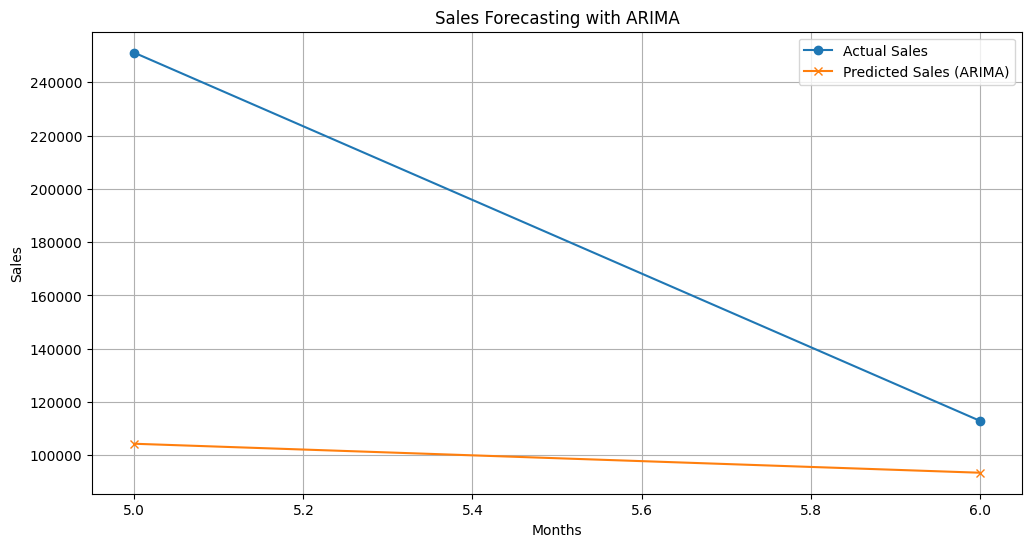

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Assume the year is constant or inferred from the dataset
item_sales['year'] = 2024  # Replace with actual year if available

# Combine 'year', 'week', and 'day' to form a valid date
item_sales['Date'] = pd.to_datetime(item_sales['year'].astype(str) + item_sales['week'].astype(str) + '1', format='%Y%W%w')

# Solution 1: Time-Series Sales Forecasting with ARIMA
# Group data by month and sum sales
item_sales_monthly = item_sales.groupby(item_sales['Date'].dt.to_period('M'))['amount'].sum().reset_index()
item_sales_monthly['Date'] = item_sales_monthly['Date'].dt.to_timestamp()

# Check stationarity (Augmented Dickey-Fuller test)
adf_test = adfuller(item_sales_monthly['amount'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# If p-value > 0.05, data is not stationary, and we may need to differencing
# Here we proceed to use ARIMA directly

# Split the data into train and test sets
train_size = int(len(item_sales_monthly) * 0.8)
train, test = item_sales_monthly['amount'][:train_size], item_sales_monthly['amount'][train_size:]

# Build and fit the ARIMA model (adjust p, d, q as needed)
# p: autoregressive terms, d: differencing, q: moving average terms
model = ARIMA(train, order=(5, 1, 2))  # Adjust order (p, d, q) based on your data
model_fit = model.fit()

# Make predictions for the test set
y_pred = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the predictions vs actual sales
plt.figure(figsize=(12, 6))
plt.plot(item_sales_monthly.index[-len(test):], test, label='Actual Sales', marker='o')
plt.plot(item_sales_monthly.index[-len(test):], y_pred, label='Predicted Sales (ARIMA)', marker='x')
plt.title('Sales Forecasting with ARIMA')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


The p-value is slightly below the 0.05 threshold, which means the data can be considered stationary. This is good because it means we don't need to further difference the data (i.e., the d parameter in the ARIMA model can be set to 0 or 1).

This is an improvement compared to the MSE you got using linear regression, it is still relatively high.

Sales Forecasting allows supermarkets to plan inventory and promotions more effectively by predicting future sales trends.

## 4.2 Solution 2: Customer Segmentation

Customer segmentation can be done using clustering algorithms like KMeans. This allows businesses to understand their customer base and personalize promotions and product offerings based on customer behaviors.

<ipython-input-89-a7291cd35b2e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['promotion_supermarket'] = pd.to_numeric(features['promotion_supermarket'], errors='coerce')
<ipython-input-89-a7291cd35b2e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_sales_promotion_clean['CustomerSegment'] = kmeans.labels_


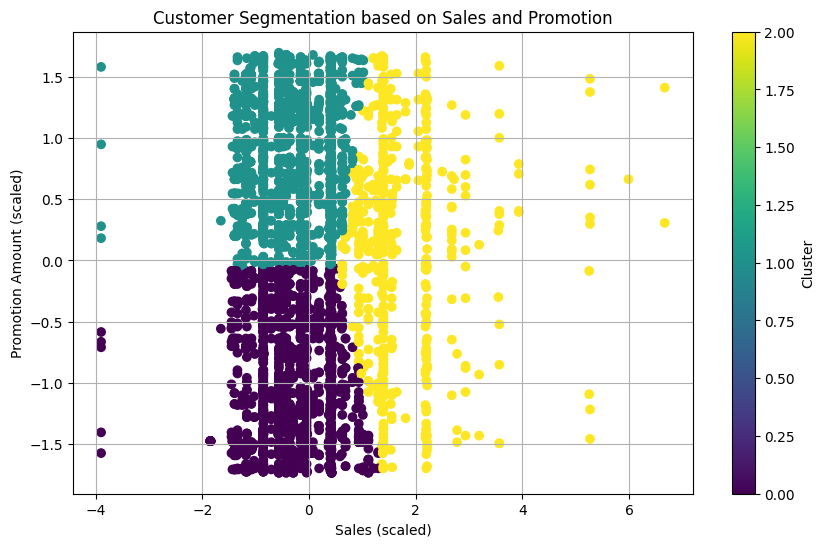

In [89]:
# Sample a smaller portion of the data to avoid crashes
item_sales_sample = item_sales.sample(n=1000, random_state=42)  # Sample a fixed number of rows
item_promotion_sample = item_promotion.sample(n=1000, random_state=42)

# Merge the sampled data
item_sales_promotion = pd.merge(item_sales_sample, item_promotion_sample[['code', 'promotion_supermarket']], on='code', how='left')

# Drop rows with NaN values in both 'amount' and 'promotion_supermarket'
item_sales_promotion_clean = item_sales_promotion.dropna(subset=['amount', 'promotion_supermarket'])

# Select features for clustering
features = item_sales_promotion_clean[['amount', 'promotion_supermarket']]

# Convert 'promotion_supermarket' to numeric (if it contains categorical values)
features['promotion_supermarket'] = pd.to_numeric(features['promotion_supermarket'], errors='coerce')

# Drop any rows with NaN values after conversion
features = features.dropna()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(scaled_features)

# Add cluster labels to the cleaned DataFrame
item_sales_promotion_clean['CustomerSegment'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('Customer Segmentation based on Sales and Promotion')
plt.xlabel('Sales (scaled)')
plt.ylabel('Promotion Amount (scaled)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


Customer Segmentation helps identify different types of customers (e.g., high-spending, promotion-sensitive) to optimize marketing efforts and personalize offerings.